In [32]:
using GaussianProcesses
using Optim
using Plots

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/nuwp4/src/backends.jl:37
[ Info: GR


In [370]:
X = [ 
     1.1354353524998535
     2.49
     0.610695293407809
     1.7254911026233826
     1.368104844151223
     2.1986144986255374
     1.070072325860212
     1.4096431172136819
     1.7310359717162336
     1.0970745953738388
     1.2092009281292428
     1.0803261741255
     0.9795322346900446
     0.5019579581930231
     1.758272284599522
     1.3278451717555992
]
X = reshape(X, 1, length(X))
y = [ 
    -0.8436678199150573
    4.54195223965578
    -0.15602232570890112
    -0.3799493116749622
    -0.7385118587720532
    1.6052010463025297
    -0.07152451853221958
    -0.3149647805076639
    -0.40242638023816185
    -0.407027438583434
    -0.3291620567448195
    -0.18071214278447928
    -0.7550128064124693
    -0.4486491270409462
    -0.39316602986049576
    -0.7263566891826466
];

In [377]:
mzero = MeanZero()
kern = Matern(5/2, 0., 0.)
# logObsNoise = log(0.)
logObsNoise = 0.
gp = GP(X, y, mzero, kern)#, logObsNoise);

GP Exact object:
  Dim = 1
  Number of observations = 16
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: Mat52Iso{Float64}, Params: [0.0, 0.0]
  Input observations = 
[1.1354353524998535 2.49 … 1.758272284599522 1.3278451717555992]
  Output observations = [-0.8436678199150573, 4.54195223965578, -0.15602232570890112, -0.3799493116749622, -0.7385118587720532, 1.6052010463025297, -0.07152451853221958, -0.3149647805076639, -0.40242638023816185, -0.407027438583434, -0.3291620567448195, -0.18071214278447928, -0.7550128064124693, -0.4486491270409462, -0.39316602986049576, -0.7263566891826466]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -42.127

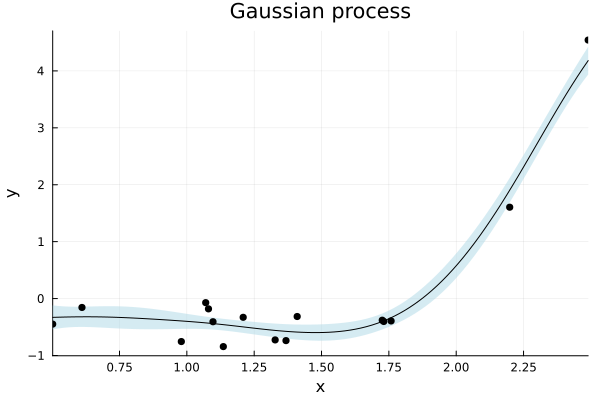

In [378]:
plot(gp; xlabel="x", ylabel="y", title="Gaussian process", legend=false, fmt=:png)

In [379]:
gp.kernel.ℓ, gp.kernel.σ2, gp.target

(1.0, 1.0, -42.127368233265436)

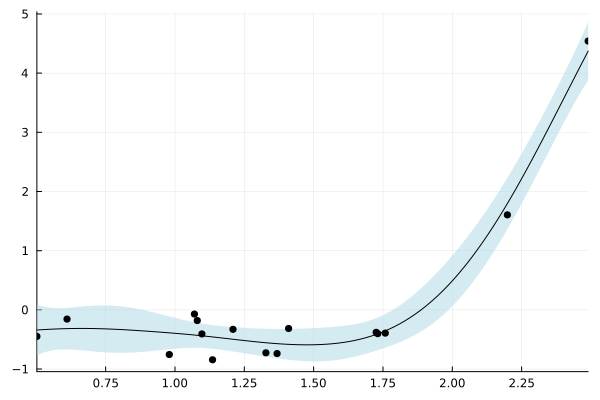

In [380]:
optimize!(gp; method=ConjugateGradient())
plot(gp; legend=false, fmt=:png)

In [381]:
gp.kernel.ℓ, gp.kernel.σ2, gp.target

(1.5469371988341862, 28.97821714308828, -14.094044455723923)